In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

In [2]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
print("\t",files_path)
files_name = 'Model_data_DA_'
append_name ="_20221021-185407"
ncda = 9
#Model_data_DA_1_20221021-185407
data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+append_name+'.csv')
    #print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV


In [3]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
df_lin = pd.read_excel(files_name,'da_buy', header=None)

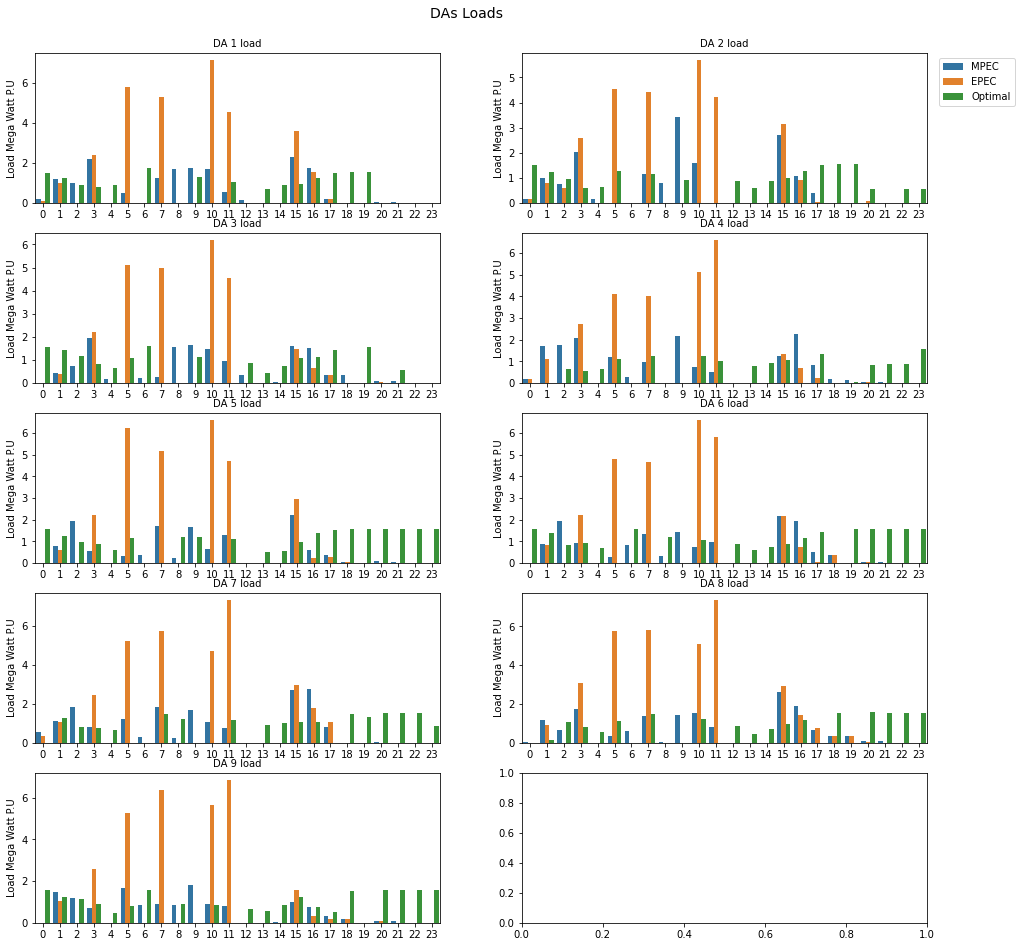

In [73]:
das_load_column = "DAs_load\nE_DAs_L"
fig, axes = plt.subplots(5, 2, figsize=(16,16))

row=0
col=0

for da in range(1,ncda+1):
    Mpec_DA_Load = []
    EPEC_DA_Load =[]
    Optimal_DA_Load=[]

    Mpec_DA_Load = data[da-1][data[da-1].Iteration == 1][das_load_column].to_list()
    EPEC_DA_Load = data[da-1][data[da-1].Iteration == 25][das_load_column].to_list()
    Optimal_DA_Load = df_lin.iloc[da-1].to_list()

    df_compare = pd.DataFrame({'MPEC':Mpec_DA_Load, 'EPEC':EPEC_DA_Load, 'Optimal':Optimal_DA_Load , 'Time':range(24)})
    df_compare = df_compare.melt(value_name='Load', var_name='Model', id_vars='Time')
    
    col = (da-1)%2
    if da>1 and col==0:
        row=row+1
    sns.barplot(data=df_compare, x='Time',y='Load', hue='Model', ax=axes[row][col])
    
    axes[row,col].set_title("DA {} load".format(da), fontsize=10)
    axes[row,col].set_xlabel("")
    axes[row,col].set_ylabel("Load Mega Watt P.U")
    
fig.suptitle('DAs Loads', fontsize=14, y=0.92);

handles, labels = axes.flatten()[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.88))

col = 0
for ax in axes.flatten():
    if(col<9):
        ax.get_legend().remove()
    col+=1
    #ax.set_rasterized(True)
#     for item in ([ ax.xaxis.label, ax.yaxis.label] +ax.get_xticklabels() + ax.get_yticklabels()): # [ ax.yaxis.label] + 
#         item.set_fontsize(10)

## How about General comparison Loads

In [77]:
das_load_column = "DAs_load\nE_DAs_L"
DA_list =[]
MPEC_load =[]
EPEC_load=[]
Optimal_load=[]

for da in range(ncda):
    DA_list.append('DA'+str(da+1))
    MPEC_load.append(data[da][data[da].Iteration == 1][das_load_column].sum())
    EPEC_load.append(data[da][data[da].Iteration == 25][das_load_column].sum())
    Optimal_load.append(df_lin.iloc[da].sum())

df_compare=pd.DataFrame({'DAs':DA_list, 'MPEC':MPEC_load, 'EPEC':EPEC_load, 'Optimal':Optimal_load})

df_compare = df_compare.melt(id_vars='DAs', var_name='Model', value_name='Load')

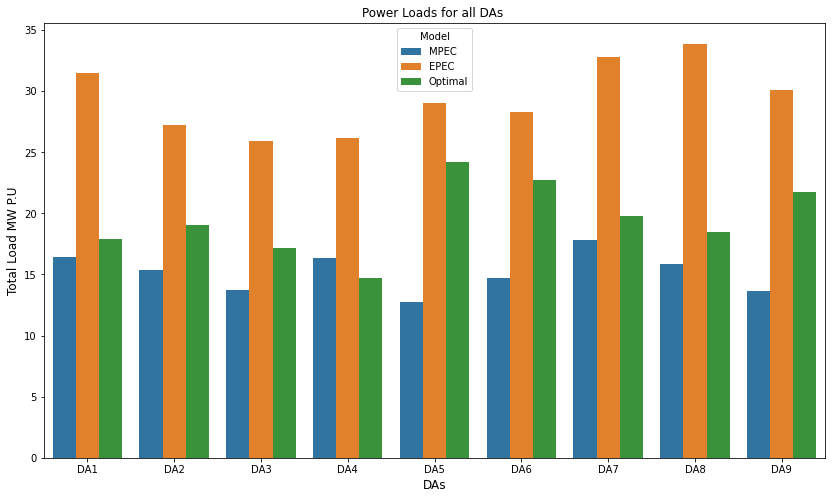

In [78]:
fig, axes = plt.subplots(1, 1, figsize=(14,8))

sns.barplot(data=df_compare, x='DAs', y='Load', hue='Model')

axes.set_title("Power Loads for all DAs ", fontsize=12)
axes.set_xlabel('DAs',fontsize=12);
axes.set_ylabel('Total Load MW P.U',fontsize=12);